In [23]:
# Загрузите данные из файла abalone.csv. 
# Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.
import pandas as pd
data = pd.read_csv("data\\abalone.csv")
data[:5]

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
# Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1.
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
data[:5]

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
# Разделите содержимое файлов на признаки и целевую переменную. 
# В последнем столбце записана целевая переменная, в остальных — признаки.
target = data['Rings']
target[:5]

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [26]:
data = data.drop('Rings', 1)
data[:5]

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [27]:
# Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 
# (не забудьте выставить "random_state=1" в конструкторе).
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

total = 50
bound = 0.52
scores = []

for n_est in range(1, total + 1):
    regr = RandomForestRegressor(n_estimators=n_est, random_state=1)
    
    # Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. 
    # Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации 
    # sklearn.cross_validation.KFold. 
    kf = KFold(n_splits=5, random_state=1, shuffle=True)

    # for train_index, test_index in kf:
    #    print("TRAIN:", train_index[:10], "TEST:", test_index[:10])
    
    # В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).
    score = cross_val_score(estimator=regr, X=data, y=target, cv=kf, scoring='r2').mean()
    scores.append(score)
    if score > bound:
        print(n_est, ">", bound)
    else:
        print(n_est)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22 > 0.52
23 > 0.52
24 > 0.52
25 > 0.52
26 > 0.52
27 > 0.52
28 > 0.52
29 > 0.52
30 > 0.52
31 > 0.52
32 > 0.52
33 > 0.52
34 > 0.52
35 > 0.52
36 > 0.52
37 > 0.52
38 > 0.52
39 > 0.52
40 > 0.52
41 > 0.52
42 > 0.52
43 > 0.52
44 > 0.52
45 > 0.52
46 > 0.52
47 > 0.52
48 > 0.52
49 > 0.52
50 > 0.52


<IPython.core.display.Javascript object>


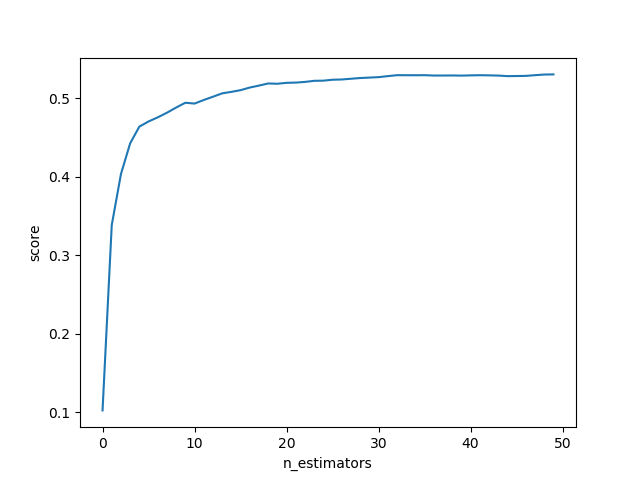

In [28]:
# Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
# plt.savefig('estimators_score.png')
plt.show()